In [3]:
import os
import cPickle as pickle


def get_data(datatype, mode):
    filename = '../../data/pickled/%s_%s.pickle' % (mode,datatype)
    with open(filename, 'rb') as f:
        X = pickle.load(f)
        outcomes = pickle.load(f)

    assert sorted(X.keys()) == sorted(outcomes.keys())
    return X, outcomes

In [37]:

size = 'all'

# get data
train_notes, train_outcomes = get_data('train', size)
ids = [pid for pid in train_outcomes.keys()]

num_notes = [len(train_notes[pid])      for pid in ids]
los       = [train_outcomes[pid]['los'] for pid in ids]

print 'ok'

ok


In [38]:
from scipy.stats.stats import pearsonr


correlation,p = pearsonr(los, num_notes)
print 'correlation:', correlation
print 'p-value:', p

correlation: 0.5416159958543181
p-value: 0.0


In [70]:
# parition into low, medium, and high


low_ids = [i for i,days in enumerate(los) if       days <= 1.5]
med_ids = [i for i,days in enumerate(los) if 1.5 < days <= 3.5]
hi_ids  = [i for i,days in enumerate(los) if 3.5 < days       ]

low_nn = [num_notes[i] for i in low_ids]
med_nn = [num_notes[i] for i in med_ids]
hi_nn  = [num_notes[i] for i in  hi_ids]

low_los = [los[i] for i in low_ids]
med_los = [los[i] for i in med_ids]
hi_los  = [los[i] for i in  hi_ids]

print 'ok'

print 'low:', len(low_ids)
print 'med:', len(med_ids)
print 'hi: ', len(hi_ids)

ok
low: 6772
med: 8109
hi:  6105


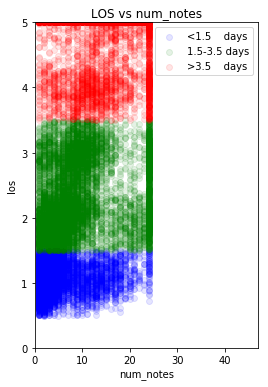

In [79]:
import pylab as plt


### HACKS TO VISUALIZE THE PLOT

# cap the LOS values or else they'll dominate the graph
capped_hi_los = [min(val,5) for val in hi_los]


### PLOT

fig = plt.figure(figsize=(4,6))
plt.title('LOS vs num_notes')
plt.scatter(low_nn,        low_los, color='blue' , label='<1.5    days', alpha=0.1)
plt.scatter(med_nn,        med_los, color='green', label='1.5-3.5 days', alpha=0.1)
plt.scatter( hi_nn,  capped_hi_los, color='red'  , label='>3.5    days', alpha=0.1)
plt.xlabel('num_notes')
plt.ylabel('los')
plt.legend()
plt.axis([0,47,0,5])
plt.show()
